In [20]:
import pandas as pd
import numpy as np

from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt 
import matplotlib as mpl
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

In [53]:
def time_series_plot(
    time_id_x,
    time_series_y,
    figsize = (7,5),
    time_series_name = None,  
    ax = None,
    mean_line = True,
    solo_plot = True
):
    
    # Grab the current axis if none provided. 
    if solo_plot is True and ax is None:
        ax = None
    elif solo_plot is False and ax is None:
        ax=plt.gca()

    # Grab the name of the time series
    if time_series_name == None:
        time_series_name = time_series_y.name

    # Build a solo plot
    if solo_plot:
        fig, ax = plt.subplots(figsize=figsize)

    # Determine the horizontal label for the time series and ticker 
    if np.issubdtype(time_id_x, np.datetime64):
        time_series_id_label = 'Date'

    elif np.issubdtype(time_id_x, np.number):
        time_series_id_label = 'Series Number'
    else: 
        time_series_id_label = 'Row Number'

    marker = "o" if len(time_id_x) < 50 else "."

    ax.scatter(
        time_id_x, 
        time_series_y,
        marker=marker, 
        s = 70, 
        color="grey", ec="k", alpha=1, 
        label = 'Eigenvalue'
    )

    ax.plot(
        time_id_x,
        time_series_y,
        color='steelblue', alpha=1,
        linewidth=1
    )

    if mean_line:
        ax.axhline(time_series_y.mean(), color = 'grey')

    ax.set_xlabel(f'\n(x)  {time_series_id_label}', fontsize=12)
    ax.set_ylabel(f'(y)  {time_series_name}\n', fontsize=12)
    ax.set_title(f'\nTime Series {time_series_name}\n', fontsize=12)

    if solo_plot is True:
        plt.show()
        plt.close()
        return 

    return ax


In [2]:
# Steel Industry Energy Consumption Dataset
csv_link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00618/Steel_industry_data.csv'
data = pd.read_csv(csv_link, parse_dates=['date'])

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  35040 non-null  datetime64[ns]
 1   Usage_kWh                             35040 non-null  float64       
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64       
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64       
 4   CO2(tCO2)                             35040 non-null  float64       
 5   Lagging_Current_Power_Factor          35040 non-null  float64       
 6   Leading_Current_Power_Factor          35040 non-null  float64       
 7   NSM                                   35040 non-null  int64         
 8   WeekStatus                            35040 non-null  object        
 9   Day_of_week                           35040 non-null  object        
 10

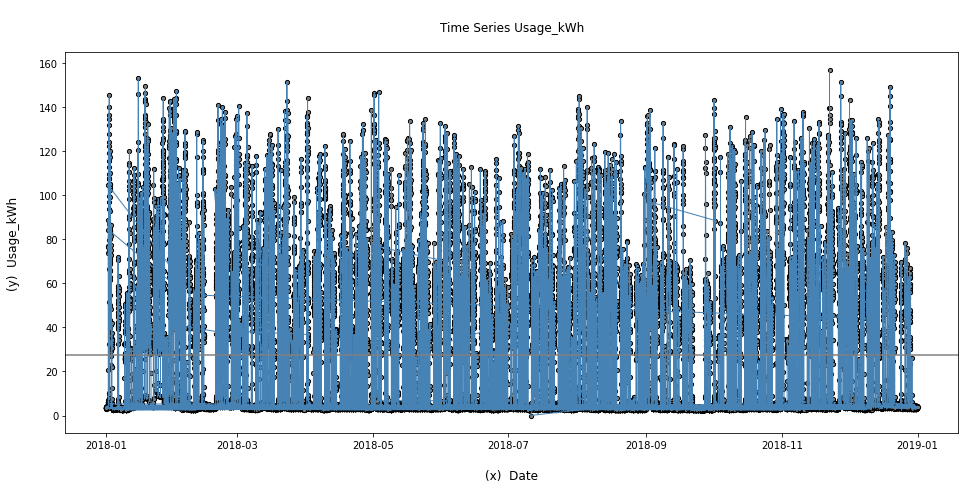

In [55]:
time_series_plot(data['date'],data['Usage_kWh'], figsize = ())

In [4]:
y = data['Usage_kWh']
num_lags = 25

In [5]:
acf_values, acf_interval, ljung_box_vals, p_vals = acf(y,nlags=num_lags,qstat=True,alpha=0.05, fft=False)
pacf_values, pacf_interval = pacf(y,nlags=num_lags,method='ywunbiased',alpha=0.05)


C:\Users\Aaron\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:994: FutureWarning: ywunbiased has been renamed ywadjusted. After release 0.13, using the old name will raise.
  warnings.warn(


In [6]:
print(
    len(np.arange(num_lags+1)),
    len([val for val in acf_values]),
    len([val for val in np.insert(ljung_box_vals, 0, None)]),
    len([val for val in np.insert(p_vals, 0, None)])

)

26 26 26 26


In [7]:
acf_interval[1:, 1]

array([0.92350114, 0.85304309, 0.78302652, 0.71187677, 0.66626313,
       0.63225991, 0.60155133, 0.57084245, 0.54146195, 0.51090542,
       0.48151083, 0.45307243, 0.42488243, 0.39663114, 0.36886737,
       0.35531447, 0.35748616, 0.36562799, 0.38234878, 0.38722712,
       0.37178823, 0.34386698, 0.30496149, 0.26536912, 0.22896242])

In [8]:
acf_interval[1:,0]

array([0.90256021, 0.81884295, 0.74080651, 0.66400539, 0.61423677,
       0.57688609, 0.54335487, 0.51022696, 0.47876832, 0.44641733,
       0.41548311, 0.38572202, 0.35639634, 0.32717482, 0.29858899,
       0.28434455, 0.28588697, 0.29339778, 0.30946235, 0.31362433,
       0.29745742, 0.26887848, 0.22942607, 0.18942037, 0.15271569])

In [9]:
pd.DataFrame(
    {'Lag':np.arange(num_lags+1),
     'AutoCorr':[val for val in acf_values],
     'ACF Inervals':[val for val in acf_interval],
     'Ljung_Box Q':[val for val in np.insert(ljung_box_vals, 0, None)],
     'p-Value':[val for val in np.insert(p_vals, 0, None)],
     'Partial':[val for val in pacf_values],
     'PACF Intervals':[val for val in pacf_interval]
    }
)

,Lag,AutoCorr,ACF Inervals,Ljung_Box Q,p-Value,Partial,PACF Intervals
0,0,1.000000,"[1.0, 1.0]",NaN,NaN,1.000000,"[1.0, 1.0]"
1,1,0.913031,"[0.9025602086059926, 0.923501142119718]",29212.721442,0.0,0.913057,"[0.9025862661611557, 0.9235271996748811]"
2,2,0.835943,"[0.818842951231737, 0.8530430926708639]",53701.494593,0.0,0.013937,"[0.003466748375757679, 0.024407681889483133]"
3,3,0.761917,"[0.740806507235902, 0.7830265219261219]",74045.705228,0.0,-0.020520,"[-0.03099009893798669, -0.010049165424261234]"
4,4,0.687941,"[0.6640053895481473, 0.7118767714333352]",90631.678205,0.0,-0.039673,"[-0.050142985741993294, -0.029202052228267834]"
5,5,0.640250,"[0.6142367656605788, 0.6662631270186518]",104998.144636,0.0,0.115025,"[0.10455428111980714, 0.12549521463353258]"
6,6,0.604573,"[0.5768860869527823, 0.6322599139665492]",117808.487497,0.0,0.058757,"[0.04828698573235964, 0.0692279192460851]"
7,7,0.572453,"[0.5433548673299449, 0.6015513300697419]",129294.134768,0.0,0.010786,"[0.00031513954051979286, 0.021256073054245248]"
8,8,0.540535,"[0.5102269577379224, 0.5708424531769041]",139534.966197,0.0,-0.015800,"[-0.026270860524834128, -0.005329927011108673]"
9,9,0.510115,"[0.4787683173709877, 0.5414619490448634]",148655.848742,0.0,0.010682,"[0.00021115452454088107, 0.021152088038266337]"


# Time Series Plot

In [10]:
data

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,2018-01-01 00:15:00,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,2018-01-01 00:30:00,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,2018-01-01 00:45:00,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,2018-01-01 01:00:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,2018-01-01 01:15:00,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,2018-12-31 23:00:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,2018-12-31 23:15:00,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,2018-12-31 23:30:00,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,2018-12-31 23:45:00,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


In [46]:
time_series_y = data['Usage_kWh'][0:25]
time_id_x = data['date'][0:25]
time_series_name = None
solo_plot = True
ax = None
figsize = (7,5)

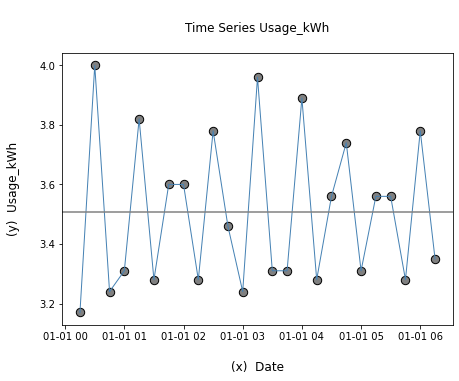

In [47]:
# Grab the current axis if none provided. 
if solo_plot is True and ax is None:
    ax = None
elif solo_plot is False and ax is None:
    ax=plt.gca()
        
# Grab the name of the time series
if time_series_name == None:
    time_series_name = time_series_y.name

# Build a solo plot
if solo_plot:
    fig, ax = plt.subplots(figsize=figsize)
    
# Determine the horizontal label for the time series and ticker 
if np.issubdtype(time_id_x, np.datetime64):
    time_series_id_label = 'Date'
    
elif np.issubdtype(time_id_x, np.number):
    time_series_id_label = 'Series Number'
else: 
    time_series_id_label = 'Row Number'
    
marker = "o" if len(time_id_x) < 50 else "."

ax.scatter(
    time_id_x, 
    time_series_y,
    marker=marker, 
    s = 70, 
    color="grey", ec="k", alpha=1, 
    label = 'Eigenvalue'
)

ax.plot(
    time_id_x,
    time_series_y,
    color='steelblue', alpha=1,
    linewidth=1
)

ax.axhline(time_series_y.mean(), color = 'grey')

ax.set_xlabel(f'\n(x)  {time_series_id_label}', fontsize=12)
ax.set_ylabel(f'(y)  {time_series_name}\n', fontsize=12)
ax.set_title(f'\nTime Series {time_series_name}\n', fontsize=12)

if solo_plot is True:
    plt.show()
    plt.close()


In [50]:
def time_series_plot(
    time_series_y,
    time_id_x,
    figsize = (7,5),
    time_series_name = None,  
    ax = None,
    mean_line = True,
    solo_plot = True
):
    
    # Grab the current axis if none provided. 
    if solo_plot is True and ax is None:
        ax = None
    elif solo_plot is False and ax is None:
        ax=plt.gca()

    # Grab the name of the time series
    if time_series_name == None:
        time_series_name = time_series_y.name

    # Build a solo plot
    if solo_plot:
        fig, ax = plt.subplots(figsize=figsize)

    # Determine the horizontal label for the time series and ticker 
    if np.issubdtype(time_id_x, np.datetime64):
        time_series_id_label = 'Date'

    elif np.issubdtype(time_id_x, np.number):
        time_series_id_label = 'Series Number'
    else: 
        time_series_id_label = 'Row Number'

    marker = "o" if len(time_id_x) < 50 else "."

    ax.scatter(
        time_id_x, 
        time_series_y,
        marker=marker, 
        s = 70, 
        color="grey", ec="k", alpha=1, 
        label = 'Eigenvalue'
    )

    ax.plot(
        time_id_x,
        time_series_y,
        color='steelblue', alpha=1,
        linewidth=1
    )

    if mean_line:
        ax.axhline(time_series_y.mean(), color = 'grey')

    ax.set_xlabel(f'\n(x)  {time_series_id_label}', fontsize=12)
    ax.set_ylabel(f'(y)  {time_series_name}\n', fontsize=12)
    ax.set_title(f'\nTime Series {time_series_name}\n', fontsize=12)

    if solo_plot is True:
        plt.show()
        plt.close()
        return 

    return ax


In [ ]:
#  Results summary 


pd.DataFrame(
    {'Lag':np.arange(num_lags+1),
     'AutoCorr':[cal_acf(x=data['Usage_kWh'], nlags=i) for i in range(num_lags+1)],
    }
)

In [ ]:
data.info()

In [ ]:
data['Usage_kWh'].iloc[0:50].plot(figsize = (18,7))